<div style="color: magenta; font-family: Arial; font-size: 26px; font-weight: bold;">
    Sprint 8.01
</div>
<br>

**Visualitzacions en Python**
<br>
<br>

<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

*Pasos:*

1. Conectar Python y MySQL Workbench: Se ejecuta el comando "pip install mysql-connector-python" para instalar el conector "mysql-connector-python". 
2. Establecemos una conexion con la base de datos atraves de una función en python logramos extraer de forma innata las tablas y datos según el orden de origen, el mismo codigo provee el cierre de conexión para segurar el consumo adicional de recursos.

In [ ]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='sprint4',
                                         user='root',
                                         password='7829')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


3. Instalamos las librerías en la terminal y las importamos:  

pip install pandas  
pip install numpy  
pip install seaborn  
pip install matplotlib  
pip install sqlalchemy

In [14]:
# Importamos las liberías:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy 


In [ ]:
# Importamos las tablas:
import mysql.connector
db = mysql.connector.connect(host='localhost',
                            database='sprint4',
                            user='root',
                            password='7829')


def load_table_to_dataframe(db, cursor, table_name):             # Cargo c/tabla en un Pandas DataFrame.                                                     
    try:
        df = pd.DataFrame()                                      # Creo un DataFrame vacío para la tabla
        cursor.execute(f"SELECT * FROM {table_name}")            # Ejecuto la consulta para extraer tablas
        column_names = [col[0] for col in cursor.description]    # Obtengo los nombres de las columnas
        data = cursor.fetchall()
        data_list = []                                           # Convierto los datos a un formato Dataframe
        for row in data:
            data_list.append(list(row))
        df = pd.DataFrame(data_list, columns=column_names)       # Creo el DataFrame (datos y nombres de columnas)
        return df
    except Exception as e:
        print(f"Error loading table '{table_name}':", e)
        return None

cursor = db.cursor()
cursor.execute("SHOW TABLES")
tables = [tabla[0] for tabla in cursor.fetchall()]

for table_name in tables:
    df_name = f"df_{table_name.lower()}"  # Convierto el nombre de la tabla a minúsculas con prefijo 'df_'
    df = load_table_to_dataframe(db, cursor, table_name)
    if df is None:
        continue

    globals()[df_name] = df  # Creo una variable global con el nombre dinámico y configuro en el DataFrame
    print(f"DataFrame: {df_name}")  # Imprimo el nombre del DataFrame
    
cursor.close()  # Desconexión
db.close()


In [ ]:
# Verificación de qué tenemos en los DFs:
 
df_card_status.info()
df_companies.info()
df_credit_cards.info()
df_products.info()
df_transaction_products.info()
df_transactions.info()
df_users.info()

In [ ]:
# Para verificar si los datos están cargados, verifico la estructura de 'products':

df_products.info() # type: ignore

In [ ]:
# Probando visualizaciones

df_products

In [ ]:
# Resumen de la estructura de 'transactions':

df_transactions.info()

In [ ]:
# Primeras filas de 'transaction_products':

df_transaction_products.head()

<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
<div style="color: magenta; font-family: Arial; font-size: 16px; font-weight: bold;">
    Ejercicio 1
</div>

**Una variable numèrica**

Creo un histograma, con el nombre de "Distribución de los montos de las transacciones", en donde se permite visualizar la distribución de una variable numérica, mostrando la frecuencia de los datos en intervalos específicos.  
    - plt.hist crea un histograma de la columna amount.  
    - bins=15 define el número de intervalos en los que se agrupan los datos.  
    - Se añade una línea para mostrar el promedio y una leyenda para mostrar el dato.  
    - Se añaden títulos y etiquetas para una mejor comprensión del gráfico.  

In [ ]:
import matplotlib.pyplot as plt

# Crear el histograma
plt.figure(figsize=(8, 5))
plt.hist(df_transactions['amount'], bins=15, color='skyblue', edgecolor='white')

amount = df_transactions['amount']
mean_value = amount.mean()
plt.axvline(mean_value, color='firebrick', linestyle='--', linewidth=1.5, label=f"Promedio: {mean_value:.2f}")
plt.legend()

plt.title('Distribución de los montos de las transacciones')
plt.xlabel('Monto de la transacción')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45, ha='center')
plt.grid(True)

plt.show()



*Análisis:*  

En el histograma hay distribución relativamente uniforme en los montos de las transacciones, ya que las alturas de las barras son muy parecidas. El promedio de los montos es de 259,01 euros.

Se puede ver una ligera disminución en la frecuencia de transacciones para montos entre 100 y 200 euros. Estaría bien investigar las causas de esto, considerando posibles restricciones en compras a partir de ciertos montos o preferencias específicas de los clientes.

También se puede ver que hay diferencias considerables en los montos de las transacciones, lo que refleja una amplia gama de precios en los productos y en las combinaciones de artículos comprados en cada transacción.

<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
<div style="color: magenta; font-family: Arial; font-size: 16px; font-weight: bold;">
    Ejercicio 2
</div>

**Dues variables numèriques**

Se extraen las columnas 'price' y 'weight' del DataFrame pues serán las que utilizaremos en la gráfica de 'scatter' a través de "plt.scatter"
Se configuran las etiquetas y colores para finalmente generar la gráfica.

In [ ]:
price = df_products['price']
weight = df_products['weight']

plt.scatter(x=price, y=weight, color='darkcyan', s=65)  

plt.xlabel('Precio', fontsize=14)    
plt.ylabel('Peso', fontsize=14)     
plt.title("Relación entre el precio y el peso del producto", fontsize=15)   
plt.grid(True, alpha=0.7)  
plt.xticks(rotation=45, ha='center')

plt.show()

*Análisis:*  

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.


<div style="color: magenta; font-family: Arial; font-size: 20px; font-weight: bold;">
    Nivel 1
</div>
<br>
<div style="color: magenta; font-family: Arial; font-size: 16px; font-weight: bold;">
    Ejercicio 3
</div>

**Una variable categòrica**

C:\Users\Nathalia\AppData\Local\Temp\ipykernel_23048\3523053399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=pais_counts.index, y=pais_counts.values, palette='crest')


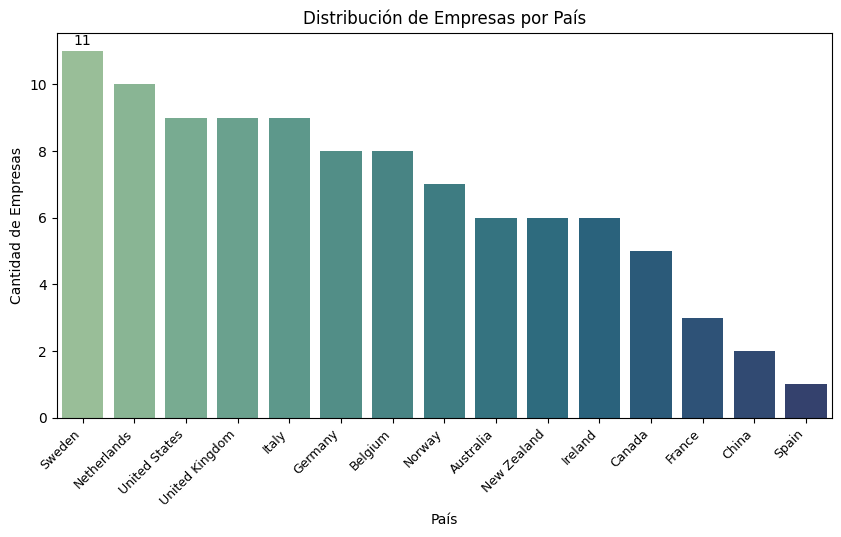

In [111]:
# Contar la frecuencia de cada país
pais_counts = df_companies['country'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=pais_counts.index, y=pais_counts.values, palette='crest')
#for i in ax.containers:ax.bar_label(i, fmt='%d', label_type='center', padding=2)
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=2, color='black', fontsize=10)
#for container in ax.containers:ax.bar_label(container, fmt='%d', label_type='center', color='white', fontsize=10)

plt.title('Distribución de Empresas por País')
plt.xlabel('País')
plt.ylabel('Cantidad de Empresas')
plt.xticks(rotation=45, ha='right', fontsize=9)

plt.show()

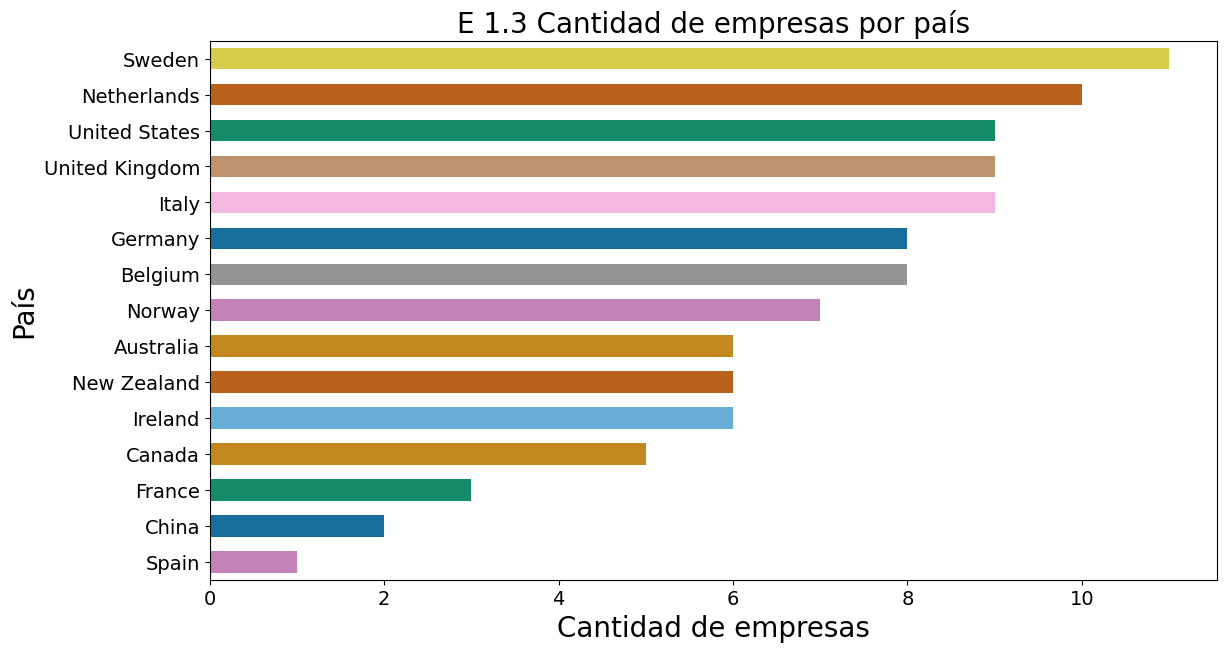

In [74]:
# E 1.3:

orden_country = df_companies['country'].value_counts().index

plt.figure(figsize=(13, 7))  
sns.countplot(y='country', data=df_companies, hue='country',order = orden_country, palette='colorblind', width=0.6)   

plt.xlabel('Cantidad de empresas', fontsize=20)
plt.ylabel('País', fontsize=20)
plt.title('E 1.3 Cantidad de empresas por país', fontsize=20)

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

# Se muestra el gráfico:
plt.show()